# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# plot options
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [3]:
# define the speed of your adv eq
a = 1.0

#define the domain
L = 10.0               # domain length
nx = 101               # number of points in my grid
dx = L/(nx-1)          # grid spacing

x = np.linspace(0, L, nx)


#define the step time and the final time
cf = 0.5               # coefficient for stability
dt = cf*dx/a           # timestep
t_final = 20.0         # final time


print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [4]:
time = np.array([])
time = np.append(time, 0.0)

In [5]:
np.roll?

In [6]:
#solve the advection equation
def ftcs(t):
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    u_current = u_next.copy()      # Update the solution
 
    t += dt                        #advance the time
    
    
    
    #we create arrays where we will store the time and the l2norm
    l2norm = np.array([])

    #compute the l2 norm and add the time to the time vector
    l2norm = np.append(l2norm, np.sqrt(np.sum(u_current**2)/len(u_current)))
    time = np.append(time, t)
    
    
    #plot the frame
    ax.clear()
    ax.plot(x, u_current)
    ax.set_ylim(0, 1.1)

In [7]:
#solve the advection equation
def lfs(t):
    u_next = .5*(np.roll(u_current, 1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, 1) - np.roll(u_current, 1))
    
    u_current = u_next.copy()      # Update the solution
 
    t += dt                        #advance the time
    
    #compute the l2 norm and add the time to the time vector
    l2norm = np.append(l2norm, np.sqrt(np.sum(u_current**2)/len(u_current)))
    time = np.append(time, t)
    
    #plot the frame
    ax.clear()
    ax.plot(x, u_current)
    ax.set_ylim(0, 1.1)

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x7f835ef237f0> (for post_execute):


UnboundLocalError: local variable 'u_current' referenced before assignment

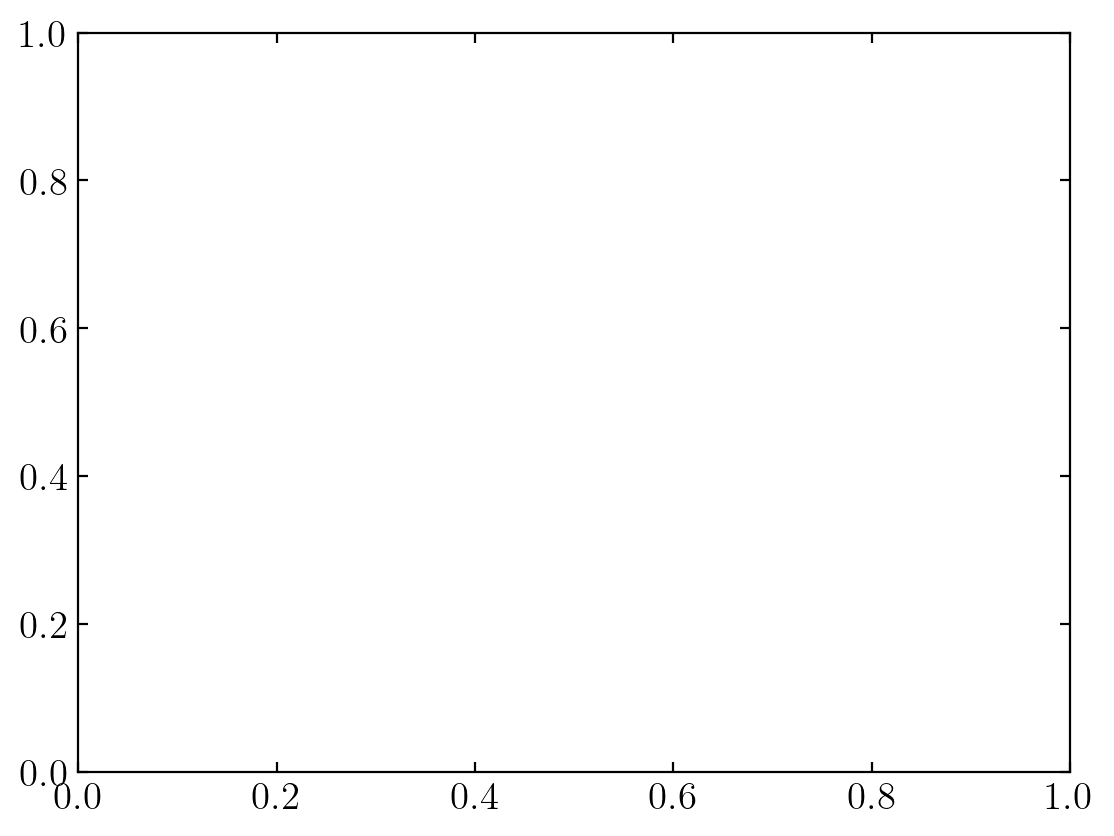

In [8]:
# plotting the animation
fig = plt.figure()
ax  = plt.axes()

ftcs_ani = animation.FuncAnimation(fig, ftcs, interval=t_final,   
                                   frames=len(x))

# Saving the Animation
f = r"animation1.gif"
writergif = animation.PillowWriter(fps=60)
ftcs_ani.save(f, writer=writergif)

plt.show()

In [ ]:
# plotting the animation
fig = plt.figure()
ax  = plt.axes()

lfs_ani = animation.FuncAnimation(fig, update, interval=10,   
                                   frames=len(x))

# Saving the Animation
f = r"animation2.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()